# Homework 5

# Task 1 (Coding)


The legend shall speak that this situation was in WW2. There are two actors in this story: a sniper and an officer. Both knew about each other’s existence. There was a river between them. The officer was always sitting in a trench, but the sniper knew his location and already calculated the distance to the target (L meters).
After a while cargo ship appeared, which blocked the direct vision of the trench. The officer decided to stand up to stretch his legs. The sniper assumed that it might happened and make a shot, hitting the officer. Let’s check this story.

Formal description: Considering the bullet as a material point and taking into account its weight and the force of wind resistance, we need to solve the following problems:


1. Find the $\alpha$ (initial angle of overhang) that is required to hit the target. Output the value in degrees.
2. At this angle, what is the maximum height the bullet will reach? Output the value.
3. Plot $y(x), F_c(t)$.


The problem should be solved in 2 ways. When air resistance is not taken into account, and when $F_c(V^2) = -kV\vec{V}$. The second problem can only be solved by numerical integration.
All specifications about Mosin rifle such as bullet weight $m$, bullet velocity at departure $V_0$, effective firing distance are taken from the official documentation.

$m = 13.6 g, L = 1500 m, k = 1.3 \cdot 10^{-5}, V_0 = 870 m/s$.

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import solve, diff, sin, cos, lambdify, sqrt
from sympy.abc import symbols

# Mass in grams
m = 13.6 * 10**(-3)
# Distance in meters
L = 1500
# For air resistance 
k = 1.3 * 10**(-5)
# Initial speed
V_0 = 870
# Gravity 
g = 9.81

alpha, t = symbols("alpha, t")

def multify(params, *args):
    lambdas = []
    for func in args:
        lambdas.append(lambdify([params], func))

    return lambdas


## Part 1 (WITHOUT air drag force)

In [144]:
x_equation = L - V_0 * cos(alpha) * t
y_equation = V_0 * sin(alpha) * t - (g * t**2) / 2

solution = solve([x_equation, y_equation], [alpha, t], dict=True)

alpha_solution1 = solution[2][alpha]
t_solution1 = solution[2][t]
alpha_solution2 = solution[3][alpha]
t_solution2 = solution[3][t]

t_max = V_0 * sin(alpha_solution1) / g
y_max = V_0 * sin(alpha_solution1) * t_max - (g * t_max ** 2) / 2

print("Angle alpha: ", np.degrees(float(alpha_solution1)), "degrees")
print("Time: ", t_solution1, "seconds")
print("Time when height is max: ", t_max, "seconds")
print("Max height: ", y_max, "meters")


t_max = V_0 * sin(alpha_solution2) / g
y_max = V_0 * sin(alpha_solution2) * t_max - (g * t_max ** 2) / 2

print("\nAngle alpha: ", np.degrees(float(alpha_solution2)), "degrees")
print("Time: ", t_solution2, "seconds")
print("Time when height is max: ", t_max, "seconds")
print("Max height: ", y_max, "meters")

Angle alpha:  0.556982768154159 degrees
Time:  1.72421940096865 seconds
Time when height is max:  0.862109700484324 seconds
Max height:  3.64555853045729 meters

Angle alpha:  89.44301723184584 degrees
Time:  177.361649788719 seconds
Time when height is max:  88.6808248943596 seconds
Max height:  38574.3360928457 meters


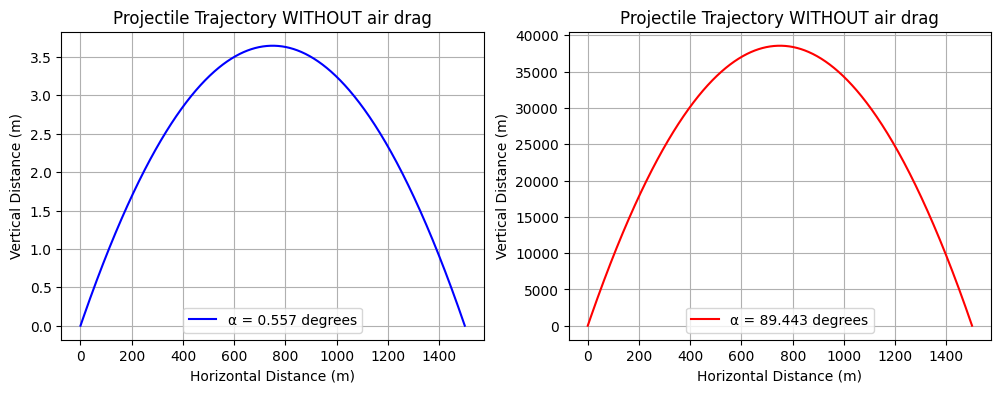

In [145]:
t = np.linspace(0, float(t_solution1), 1000)  # Adjust the time range as needed

x_equation1 = L - V_0 * np.cos(float(alpha_solution1)) * t
y_equation1 = V_0 * np.sin(float(alpha_solution1)) * t - (g * t**2) / 2

t = np.linspace(0, float(t_solution2), 1000)  # Adjust the time range as needed

x_equation2 = L - V_0 * np.cos(float(alpha_solution2)) * t
y_equation2 = V_0 * np.sin(float(alpha_solution2)) * t - (g * t**2) / 2

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(x_equation1, y_equation1, color='blue', label=f'α = {np.degrees(float(alpha_solution1)):.3f} degrees')
plt.title('Projectile Trajectory WITHOUT air drag')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(x_equation2, y_equation2, color='red', label=f'α = {np.degrees(float(alpha_solution2)):.3f} degrees')
plt.title('Projectile Trajectory WITHOUT air drag')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.grid(True)
plt.legend()
plt.savefig("task1_1_traj.jpg")
plt.show()

## Part 2 (WITH air drag force)

Alphas:  1.8334649444186333 and 68.64034385667257 degrees
Time when the bullet hits the ground for angle 1.8334649444186333 degrees: 3.8000000000000003
Time when the bullet hits the ground for angle 68.64034385667257 degrees: 41.62
Maximum height for angle 1.8334649444186333 degrees: 18.633922413020397 meters
Maximum height for angle 68.64034385667257 degrees: 2041.3790637602076 meters


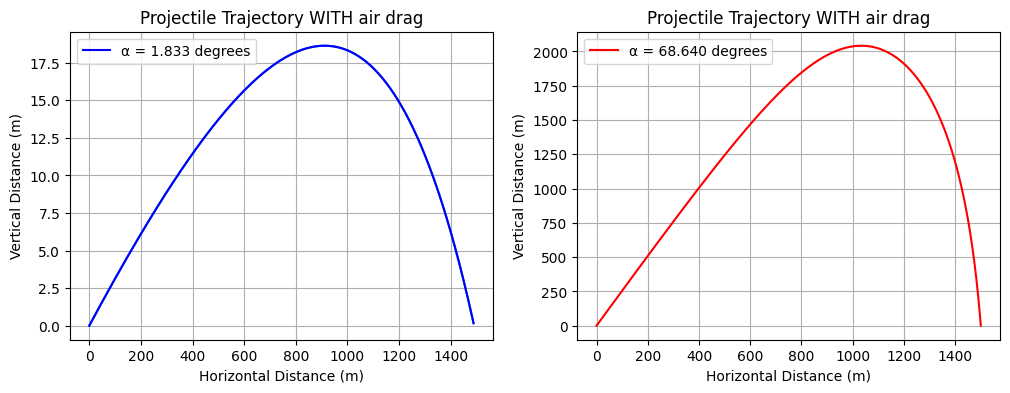

In [148]:
from scipy.integrate import odeint

potential_angles = np.arange(0.01, np.pi, 0.001)
t = np.arange(0, 50, 0.01)

def nonliear_ode(X, t):
    x, vx, y, vy = X
    # Nonlinear dynamics
    dx = np.array([vx, -k*np.sqrt(vx**2+vy**2)*vx/m,
                   vy, -k*np.sqrt(vx**2+vy**2)*vy/m - g])

    return dx

# Store the times when the bullet hits the ground for each angle
hit_times = []
distances = []
for alpha in potential_angles: 
    X0 = np.array([0, V_0*np.cos(alpha), 0, V_0*np.sin(alpha)])
    x_nl = odeint(nonliear_ode, X0, t)
    t_cross = np.where(np.diff(np.sign(x_nl[:, 2])))[0]
    distances.append(x_nl[t_cross[1], 0])

distances = np.array(distances)

correct_alphas = [potential_angles[i] for i in np.where(np.diff(np.sign(distances - L)))[0]]

print("Alphas: ", np.degrees(correct_alphas[0]), "and", np.degrees(correct_alphas[1]), "degrees")

X0_1 = np.array([0, V_0*np.cos(correct_alphas[0]), 0, V_0*np.sin(correct_alphas[0])])
x_nl_1 = odeint(nonliear_ode, X0_1, t)
# plt.plot(x_nl_1[:, 0], x_nl_1[:, 2])
t_cross_1 = np.where(np.diff(np.sign(x_nl_1[:, 2])))[0]
hit_time_1 = t[t_cross_1[1]]
print("Time when the bullet hits the ground for angle", np.degrees(correct_alphas[0]), "degrees:", hit_time_1)

# Extract x and y coordinates until the bullet hits the ground
x_plot_1 = x_nl_1[:t_cross_1[1], 0]
y_plot_1 = x_nl_1[:t_cross_1[1], 2]

X0_2 = np.array([0, V_0*np.cos(correct_alphas[1]), 0, V_0*np.sin(correct_alphas[1])])
x_nl_2 = odeint(nonliear_ode, X0_2, t)
# plt.plot(x_nl_2[:, 0], x_nl_2[:, 2])
t_cross_2 = np.where(np.diff(np.sign(x_nl_2[:, 2])))[0]
hit_time_2 = t[t_cross_2[1]]
print("Time when the bullet hits the ground for angle", np.degrees(correct_alphas[1]), "degrees:", hit_time_2)

# Extract x and y coordinates until the bullet hits the ground
x_plot_1 = x_nl_1[:t_cross_1[1], 0]
y_plot_1 = x_nl_1[:t_cross_1[1], 2]
x_plot_2 = x_nl_2[:t_cross_2[1], 0]
y_plot_2 = x_nl_2[:t_cross_2[1], 2]

# Find the maximum height (max y value)
max_y_1 = np.max(y_plot_1)
max_y_2 = np.max(y_plot_2)
print("Maximum height for angle", np.degrees(correct_alphas[0]), "degrees:", max_y_1, "meters")
print("Maximum height for angle", np.degrees(correct_alphas[1]), "degrees:", max_y_2, "meters")

plt.figure(figsize=(12,4))

plt.subplot(121)

plt.plot(x_plot_1, y_plot_1)
plt.plot(x_plot_1, y_plot_1, color='blue', label=f'α = {np.degrees(float(correct_alphas[0])):.3f} degrees')
plt.title('Projectile Trajectory WITH air drag')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(x_plot_2, y_plot_2, color='red', label=f'α = {np.degrees(float(correct_alphas[1])):.3f} degrees')
plt.title('Projectile Trajectory WITH air drag')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.grid(True)
plt.legend()
plt.savefig("task1_2_traj.jpg")
plt.show()

# Task 2 (Coding)

A particle M (mass m) is moving inside of the cylindrical channel of the moving object $D$. The object $D$ has a radius $r$. No friction between $M$ and $D$.
Determine the equation of the relative motion of this particle $x = f(t)$. Also you need to find the pressure force the particle acting on the channel wall.
At the end, you should provide:

1. simulate this mechanism (obtain all positions);
2. show all acceleration components, inertial forces, gravity force and N;
3. plot of the particle $x(t)$, till the time, while point won’t leave the channel;
4. plot $N(t)$, till the time, while point won’t leave the channel.

Needed variables:
$m = 0.02, \omega = \pi, a = 60, \alpha = 45^o;$

Initial conditions: 
$t_0 = 0, x_0 = 0, x_0 = 0.4.$

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import solve, diff, sin, cos, lambdify, sqrt, atan, asin
from sympy.abc import symbols
from IPython.display import HTML, display

num_frames = 120
t_start = 0
t_end = 3
t_values = np.linspace(t_start, t_end, num_frames)

O1O = 60
alpha = np.radians(45)
mass = 0.02
ang_vel = np.pi
g = 9.8
vel_rel_init = 0.4

# Set the needed variables for further solving using sympy
t, phi, x_M, y_M, k_OO2, b_OO2, px1, px2, py1, py2, k, b, O1M, OM, O1M1 = symbols('t, phi, x_M, y_M, k_OO2, b_OO2, px1, px2, py1, py2, k, b, O1M, OM, O1M1')


def eq_to_lambda_OO2(*args):
  lambdas = []
  for func in args:
    lambdas.append(lambdify([(px1, py1, px2, py2)], func))

  return lambdas

def eq_to_lambda_O1M(*args):
  lambdas = []
  for func in args:
    lambdas.append(lambdify([(k, b, O1M)], func))

  return lambdas

def multify(params, *args):
    lambdas = []
    for func in args:
        lambdas.append(lambdify([params], func))

    return lambdas


phi_ = lambdify(t, np.pi*t)

func_rel_vel_M = 10 * sqrt(2) * t + 5 * sqrt(2)
rel_vel_M_ = lambdify(t, func_rel_vel_M)

acc_rel_M = 10 * sqrt(2) #const value 

func_acc_tang_M = 1.2 * t * O1M # formula epsilon * O1M
acc_tang_M_ = multify((t, O1M), func_acc_tang_M)[0]

func_acc_norm_M = (O1M * (0.6 * (t ** 2) + 1))**2 / O1M # formula V_tr^2/O1M
acc_norm_M_ = multify((t, O1M), func_acc_norm_M)[0]

func_acc_cor = 10 * sqrt(2) * (0.6 * t**2 + 1) * (t + 1)
acc_cor_ = lambdify(t, func_acc_cor)

# Gives the length of the OM
func_len_OM = 5 * sqrt(2) * (t**2 + t)
len_OM_ = lambdify(t, func_len_OM)

# Gives the length of O1M
func_len_O1M = sqrt(O1O**2 + OM**2 - 2 * O1O * OM * cos(alpha))
len_O1M_ = lambdify(OM, func_len_O1M)

# Finds coordinates of point O
func_x_O = O1O*cos(phi)
func_y_O = O1O*sin(phi)
x_O_, y_O_ = lambdify(phi, func_x_O), lambdify(phi, func_y_O)

# Finds coordinates of point O2
func_x_O2 = O1O*cos(phi + np.radians(90))
func_y_O2 = O1O*sin(phi + np.radians(90))
x_O2_, y_O2_ = lambdify(phi, func_x_O2), lambdify(phi, func_y_O2)


In [140]:
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-70, 70)
ax.set_ylim(-70, 70)

traj, = ax.plot([], [], color='deepskyblue', linestyle='--', lw = 2, label="M traj.")
line_O1O, = ax.plot([], [], 'r', lw = 2, label="O1O")
line_O1O2, = ax.plot([], [], 'g', lw = 2, label="O1O2")
line_OO2, = ax.plot([], [], color='gold', linestyle='--', lw = 2, label="OO2")
line_O1M, = ax.plot([], [], 'b--', lw = 2, label="O1M")
# afull, = ax.plot([], [], 'm', lw = 2, label="afull")
# anorm, = ax.plot([], [], 'g', lw = 2, label="anorm")
# acor, = ax.plot([], [], 'c', lw = 2, label="acor")
# vrel, = ax.plot([], [], 'y', lw = 2, label="vrel")

point_M, = ax.plot([], [], 'bo', markersize = 5)
point_O, = ax.plot([], [], 'ro', markersize = 5)
point_O2, = ax.plot([], [], 'go', markersize = 5)




vel_tr_M_values = []
vel_rel_M_values = []
acc_rel_M_values = []
acc_tr_M_values = []
acc_full_values = []

def update(frame):
    phi = phi_(t_values[frame])
    x_O, y_O = x_O_(phi), y_O_(phi)
    point_O.set_data(x_O, y_O)
    
    x_O2, y_O2 = x_O2_(phi), y_O2_(phi)
    point_O2.set_data(x_O2, y_O2)
    
    OM = len_OM_(t_values[frame])
    O1M = len_O1M_(OM)    
    
    angle_gamma = np.arcsin(np.sin(alpha)*OM / O1M) + phi
    x_M = O1M * cos(angle_gamma)
    y_M = O1M * sin(angle_gamma)
    
    traj.set_data(np.append(traj.get_xdata(), x_M), np.append(traj.get_ydata(), y_M))
    line_O1O.set_data([0, x_O], [0, y_O])
    line_O1O2.set_data([0, x_O2], [0, y_O2])
    line_OO2.set_data([x_O, x_O2], [y_O, y_O2])
    line_O1M.set_data([0, x_M], [0, y_M])
    
    point_M.set_data((x_M, y_M))
    
    acc_tr_tau = acc_tang_M_((t_values[frame], O1M))
    acc_tr_n = acc_norm_M_((t_values[frame], O1M))
    acc_cor = acc_cor_((t_values[frame]))
    
    acc_x_full = acc_tr_tau*sin(angle_gamma) + acc_tr_n*cos(angle_gamma) + acc_rel_M*cos(alpha - phi) + acc_cor*cos(alpha + phi)
    acc_y_full = acc_tr_tau*cos(angle_gamma) - acc_tr_n*sin(angle_gamma) + acc_rel_M*sin(alpha - phi) - acc_cor*sin(alpha + phi)
    
    # Update the values
    vel_tr_M_values.append(ang_vel * O1M) # the formula is omega * R 
    vel_rel_M_values.append(rel_vel_M_((t_values[frame])))
    acc_rel_M_values.append(acc_rel_M) # the value is const,therefore it is a line y = a_rel_M 
    acc_tr_M_values.append(sqrt(acc_tr_tau**2 + acc_tr_n**2)) # a_tr_full^2 = a_t^2 + a_n^2
    acc_full_values.append(sqrt(acc_x_full**2 + acc_y_full**2))
    
    # If you want to see the vectors on the simulation uncomment this part
    # scale_factor = 0.008
    # scale_factor1 = 0.02
    # '-' since x in the report is directed to the left
    # afull.set_data([x_M, x_M-acc_x_full], [y_M, y_M+acc_y_full])
    # anorm.set_data([x_M, -x_M - acc_tr_n*cos(angle_gamma)*scale_factor1], [y_M, -y_M-acc_tr_n*sin(angle_gamma)*scale_factor1])
    # acor.set_data([x_M, -acc_cor*cos(alpha + phi)], [y_M, -acc_cor*sin(alpha + phi)])
    # vrel.set_data([x_M, x_M - rel_vel_M_((t_values[frame]))*cos(alpha - phi)], [y_M, y_M + rel_vel_M_((t_values[frame]))*sin(alpha - phi)])
    
    return ...


plt.title('Triangle with a tube rotates')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc=(1.005, 0.65))
    
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=40)

plt.gca().set_aspect(aspect='equal', adjustable='box')    
plt.grid(True)
# ani.save("task2_sim.gif")
display(HTML(ani.to_jshtml()))
plt.close(fig)


C:\Users\User\AppData\Local\Temp\ipykernel_14372\809375715.py:32: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_O.set_data(x_O, y_O)
C:\Users\User\AppData\Local\Temp\ipykernel_14372\809375715.py:35: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_O2.set_data(x_O2, y_O2)
C:\Users\User\AppData\Local\Temp\ipykernel_14372\809375715.py:50: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_M.set_data((x_M, y_M))
C:\Users\User\AppData\Local\Temp\ipykernel_14372\809375715.py:40: RuntimeWarning: invalid value encountered in arcsin
  angle_gamma = np.arcsin(np.sin(alpha)*OM / O1M) + phi
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: RuntimeWarning: invalid value e

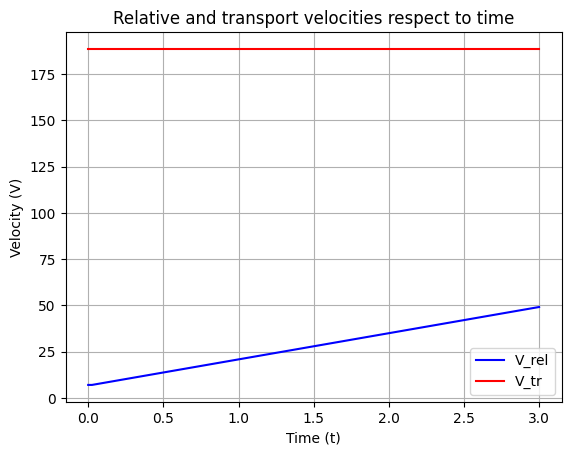

In [66]:
# We need to do this since in the update function we get one more frame
vel_rel_M_values = vel_rel_M_values[:num_frames]
vel_tr_M_values = vel_tr_M_values[:num_frames]

plt.plot(t_values, vel_rel_M_values, label="V_rel", color="blue")
plt.plot(t_values, vel_tr_M_values, label="V_tr", color="red")
plt.title('Relative and transport velocities respect to time')
plt.xlabel('Time (t)')
plt.ylabel('Velocity (V)')
plt.grid(True)
plt.legend()
plt.savefig("task2_plot_vel.jpg")


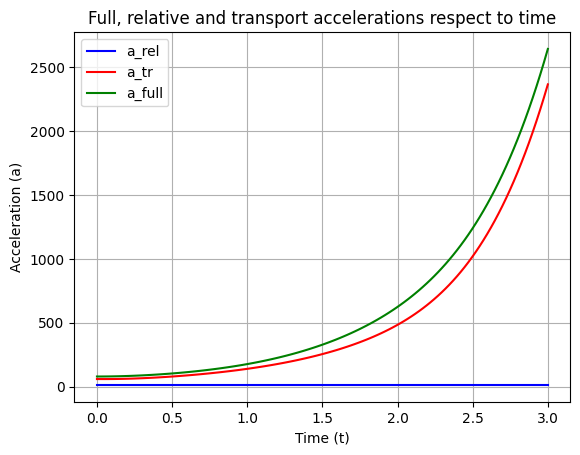

In [64]:
# We need to do this since in the update function we get one more frame
acc_rel_M_values = acc_rel_M_values[:num_frames]
acc_tr_M_values = acc_tr_M_values[:num_frames]
acc_full_values = acc_full_values[:num_frames]

plt.plot(t_values, acc_rel_M_values, label="a_rel", color="blue")
plt.plot(t_values, acc_tr_M_values, label="a_tr", color="red")
plt.plot(t_values, acc_full_values, label="a_full", color="green")
plt.title('Full, relative and transport accelerations respect to time')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a)')
plt.grid(True)
plt.legend()
plt.savefig("task2_plot_acc.jpg")